In [ ]:
from pycaret.regression import *
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

def read_and_clean_data(filename):
    df = pd.read_csv(filename, parse_dates = ['time'])
    #df = df[['XRP_price', 'vader_int', 'pos','neu','neg','total']]
    
    df["pospercent"] = df.pos / df.total
    df["neupercent"] = df.neu / df.total
    df["negpercent"] = df.neg / df.total
    
    df.vader_int = df.vader_int.astype(int)
    df.pos = df.pos.astype(int)
    df.neu = df.neu.astype(int)
    df.neg = df.neg.astype(int)
    df.total = df.total.astype(int)
    
    df["BTC_change"] = (df.BTC_price - df.BTC_price.shift(1))
    df["SPY_change"] = (df.SPY_price - df.SPY_price.shift(1))
    df["VXX_change"] = (df.VXX_price - df.VXX_price.shift(1))
    df["XAU_change"] = (df.XAU_price - df.XAU_price.shift(1))
    
    df["change"] = (df.XRP_price - df.XRP_price.shift(-1)).shift(1)

    df = df.drop(['XRP_price','BTC_price','SPY_price','VXX_price','XAU_price','total','pos','neg','neu','time','vader_int','neupercent'], axis = 1)
    df = df.dropna()
    df = df.reset_index(drop = True)
    return df

## Day

## Hour

In [2]:
hour = read_and_clean_data("data/full_hour.csv")
hour_train, hour_test = train_test_split(hour, test_size = 0.25, random_state = 42)
hour_train, hour_test = hour_train.reset_index(drop = True), hour_test.reset_index(drop = True)

hour.head(5)

,dom,pospercent,negpercent,BTC_change,SPY_change,VXX_change,XAU_change,change
0,Positive,0.333333,0.333333,7.00,0.0,0.0,-0.17575,-0.00020
1,Positive,0.600000,0.000000,-601.00,0.0,0.0,1.05325,0.00350
2,Neutral,0.238095,0.190476,-548.75,0.0,0.0,0.48325,0.00440
3,Positive,0.545455,0.181818,19.50,0.0,0.0,-1.01825,-0.00495
4,Positive,0.750000,0.000000,-91.50,0.0,0.0,-1.34650,-0.01245


In [3]:
hoursetup = setup(data = hour_train, target = 'change', silent = True)

,Description,Value
0,session_id,2855
1,Target,change
2,Original Data,"(926, 8)"
3,Missing Values,0
4,Numeric Features,6
5,Categorical Features,1
6,Ordinal Features,0
7,High Cardinality Features,0
8,High Cardinality Method,None
9,Transformed Train Set,"(648, 9)"


In [4]:
best_model_hour = compare_models(sort = 'MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0037,0.0000,0.0054,-0.0306,0.0050,1.2538,0.1890
lar,Least Angle Regression,0.0037,0.0000,0.0054,-0.0340,0.0050,1.2714,0.0020
ridge,Ridge Regression,0.0037,0.0000,0.0054,-0.0289,0.0051,1.2215,0.0020
en,Elastic Net,0.0037,0.0000,0.0054,-0.0224,0.0053,1.0154,0.0020
par,Passive Aggressive Regressor,0.0037,0.0000,0.0054,-0.0183,0.0053,1.0000,0.0020
lasso,Lasso Regression,0.0037,0.0000,0.0054,-0.0224,0.0053,1.0154,0.0030
omp,Orthogonal Matching Pursuit,0.0037,0.0000,0.0054,-0.0324,0.0052,1.1299,0.0020
br,Bayesian Ridge,0.0037,0.0000,0.0054,-0.0250,0.0051,1.1561,0.0020
huber,Huber Regressor,0.0037,0.0000,0.0054,-0.0234,0.0051,1.1074,0.0050
llar,Lasso Least Angle Regression,0.0037,0.0000,0.0054,-0.0224,0.0053,1.0154,0.0020


In [9]:
pred = predict_model(best_model_hour, data=hour_test)
pred = pred.rename({'change':'real', 'Label':'pred'}, axis = 1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0039,0.0000,0.0055,-0.0080,0.0052,1.1538


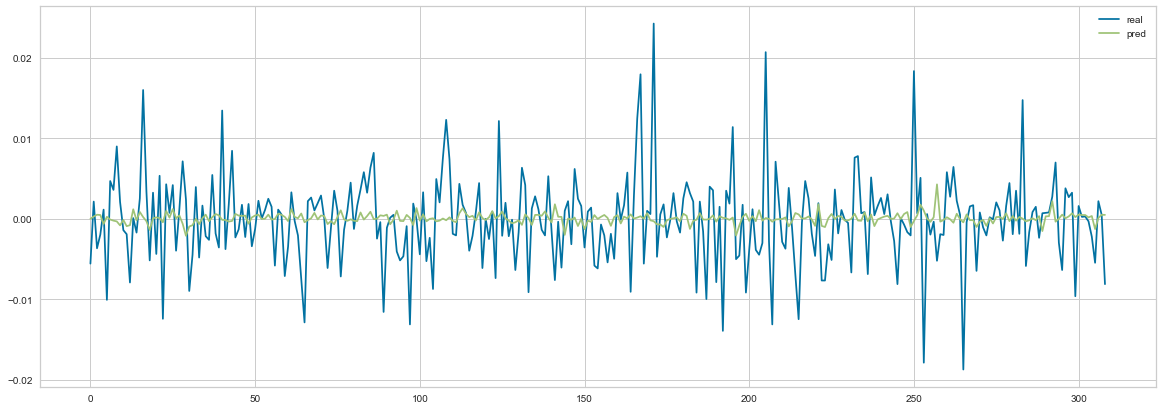

In [10]:
ax = pred[['real', 'pred']].plot(figsize = (20, 7))
fig = ax.get_figure()
fig.savefig('images/hour_pycaret_pred.pdf', format = "pdf", dpi = 300,bbox_inches='tight')
fig.savefig('images/hour_pycaret_pred.jpg', format = "jpg", dpi = 300,bbox_inches='tight')

In [11]:
plot_model(best_model_hour, plot = 'residuals', save = True)

'Residuals.png'

In [12]:
plot_model(best_model_hour, plot = 'feature', save = True)

'Feature Importance.png'

## Minute

In [ ]:
minute = read_and_clean_data("data/full_minute.csv")
minute_train, minute_test = train_test_split(minute, test_size = 0.01, random_state = 42)
minute_train, minute_test = minute_train.reset_index(drop = True), minute_test.reset_index(drop = True)

minute.head(5)

In [ ]:
minutesetup = setup(data = minute_train, target = 'change', silent = True, transformation = True)

In [ ]:
minute 

In [ ]:
best_model_minute = compare_models()

In [ ]:
pred = predict_model(best_model_minute, data=minute_test)

In [ ]:
pred

In [ ]:
pred[['change', 'Label']].plot(figsize = (20, 7))